In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Data Science\udemy\Notebooks\DATA\mushrooms.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

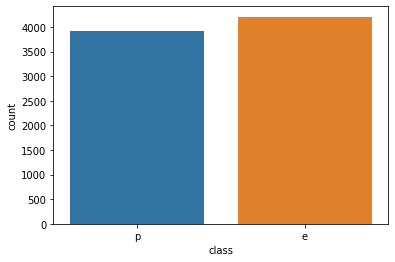

In [5]:
sns.countplot(data=df, x='class')
plt.show()

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
feat_uni = df.describe().T.reset_index().sort_values('unique')

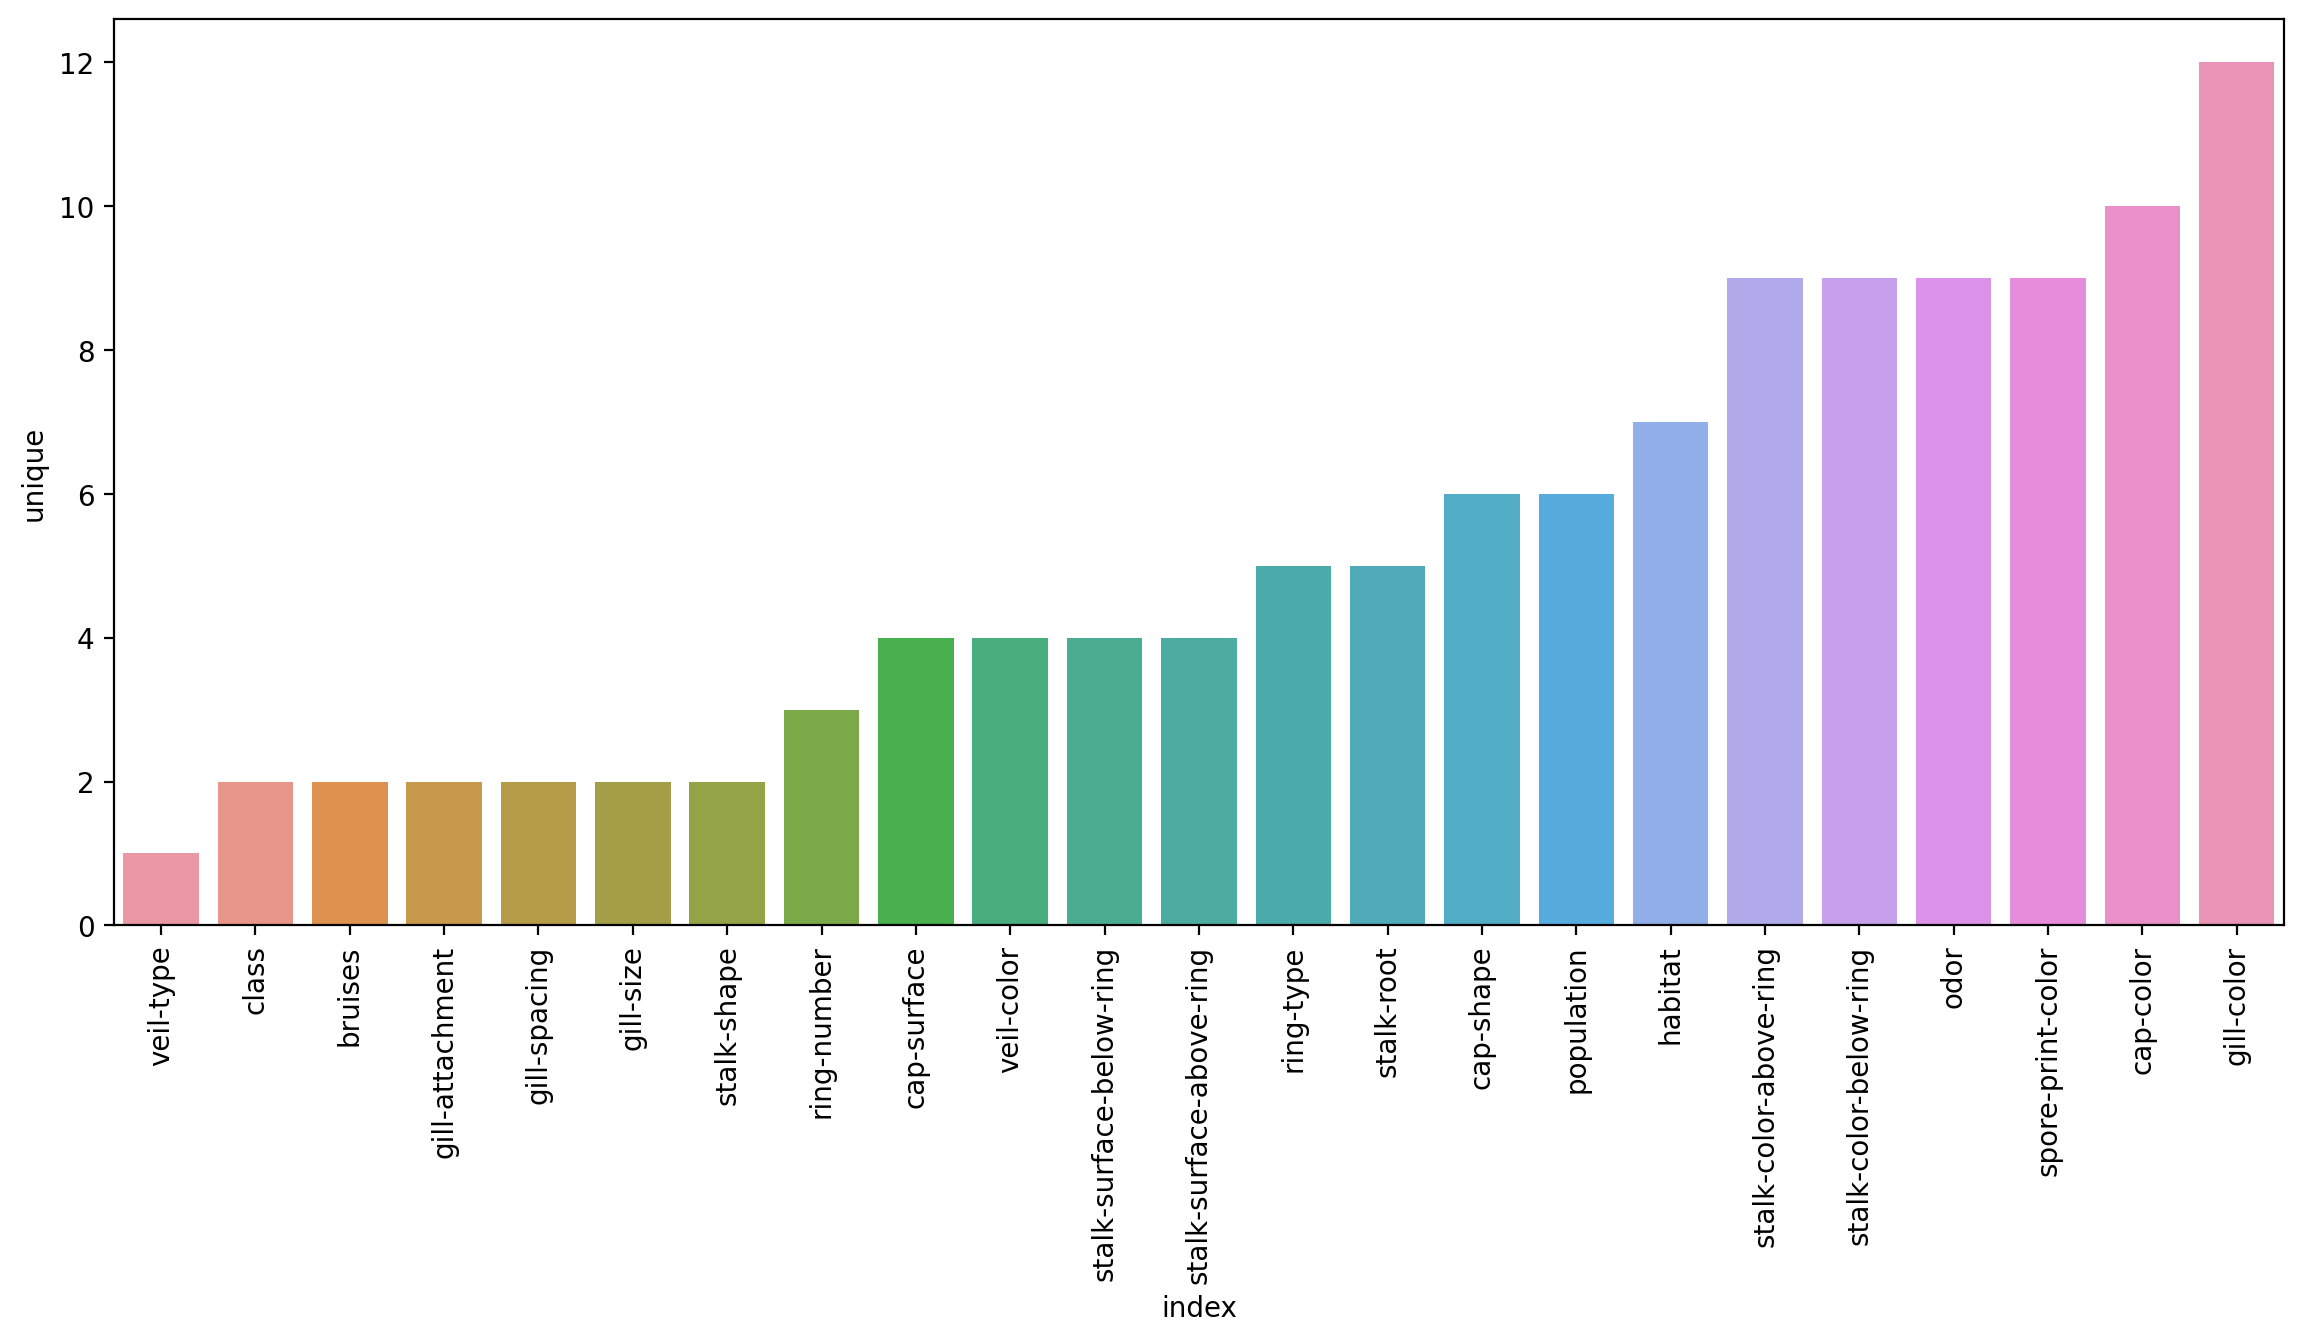

In [17]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feat_uni, x = 'index', y='unique')
plt.xticks(rotation=90)
plt.show()

In [18]:
X = df.drop('class', axis=1)

In [19]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [21]:
X = pd.get_dummies(X, drop_first=True)

In [22]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [23]:
y = df['class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
model = AdaBoostClassifier(n_estimators = 1)

In [28]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [31]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [34]:
model.feature_importances_.argmax()

22

In [36]:
X.columns[22]

'odor_n'

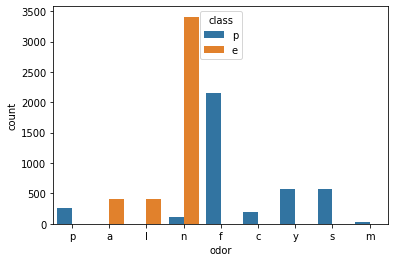

In [38]:
sns.countplot(data=df, x='odor', hue='class')
plt.show()

In [39]:
len(X.columns)

95

In [40]:
from sklearn.metrics import accuracy_score

In [43]:
error_rates = []
for i in range(1, 96):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test, pred)
    error_rates.append(err)

In [44]:
error_rates

[0.12223133716160783,
 0.12223133716160783,
 0.09515996718621822,
 0.0459392945036915,
 0.031173092698933536,
 0.052502050861361726,
 0.020508613617719496,
 0.018867924528301883,
 0.012305168170631653,
 0.003281378178835115,
 0.003281378178835115,
 0.008203445447087732,
 0.003281378178835115,
 0.001640689089417502,
 0.001640689089417502,
 0.001640689089417502,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

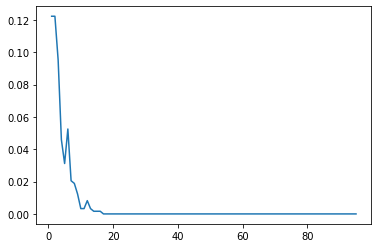

In [47]:
plt.plot(range(1, 96), error_rates)
plt.show()

In [51]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns = ['Importance'])

In [53]:
feats = feats[feats['Importance'] > 0]

In [54]:
feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


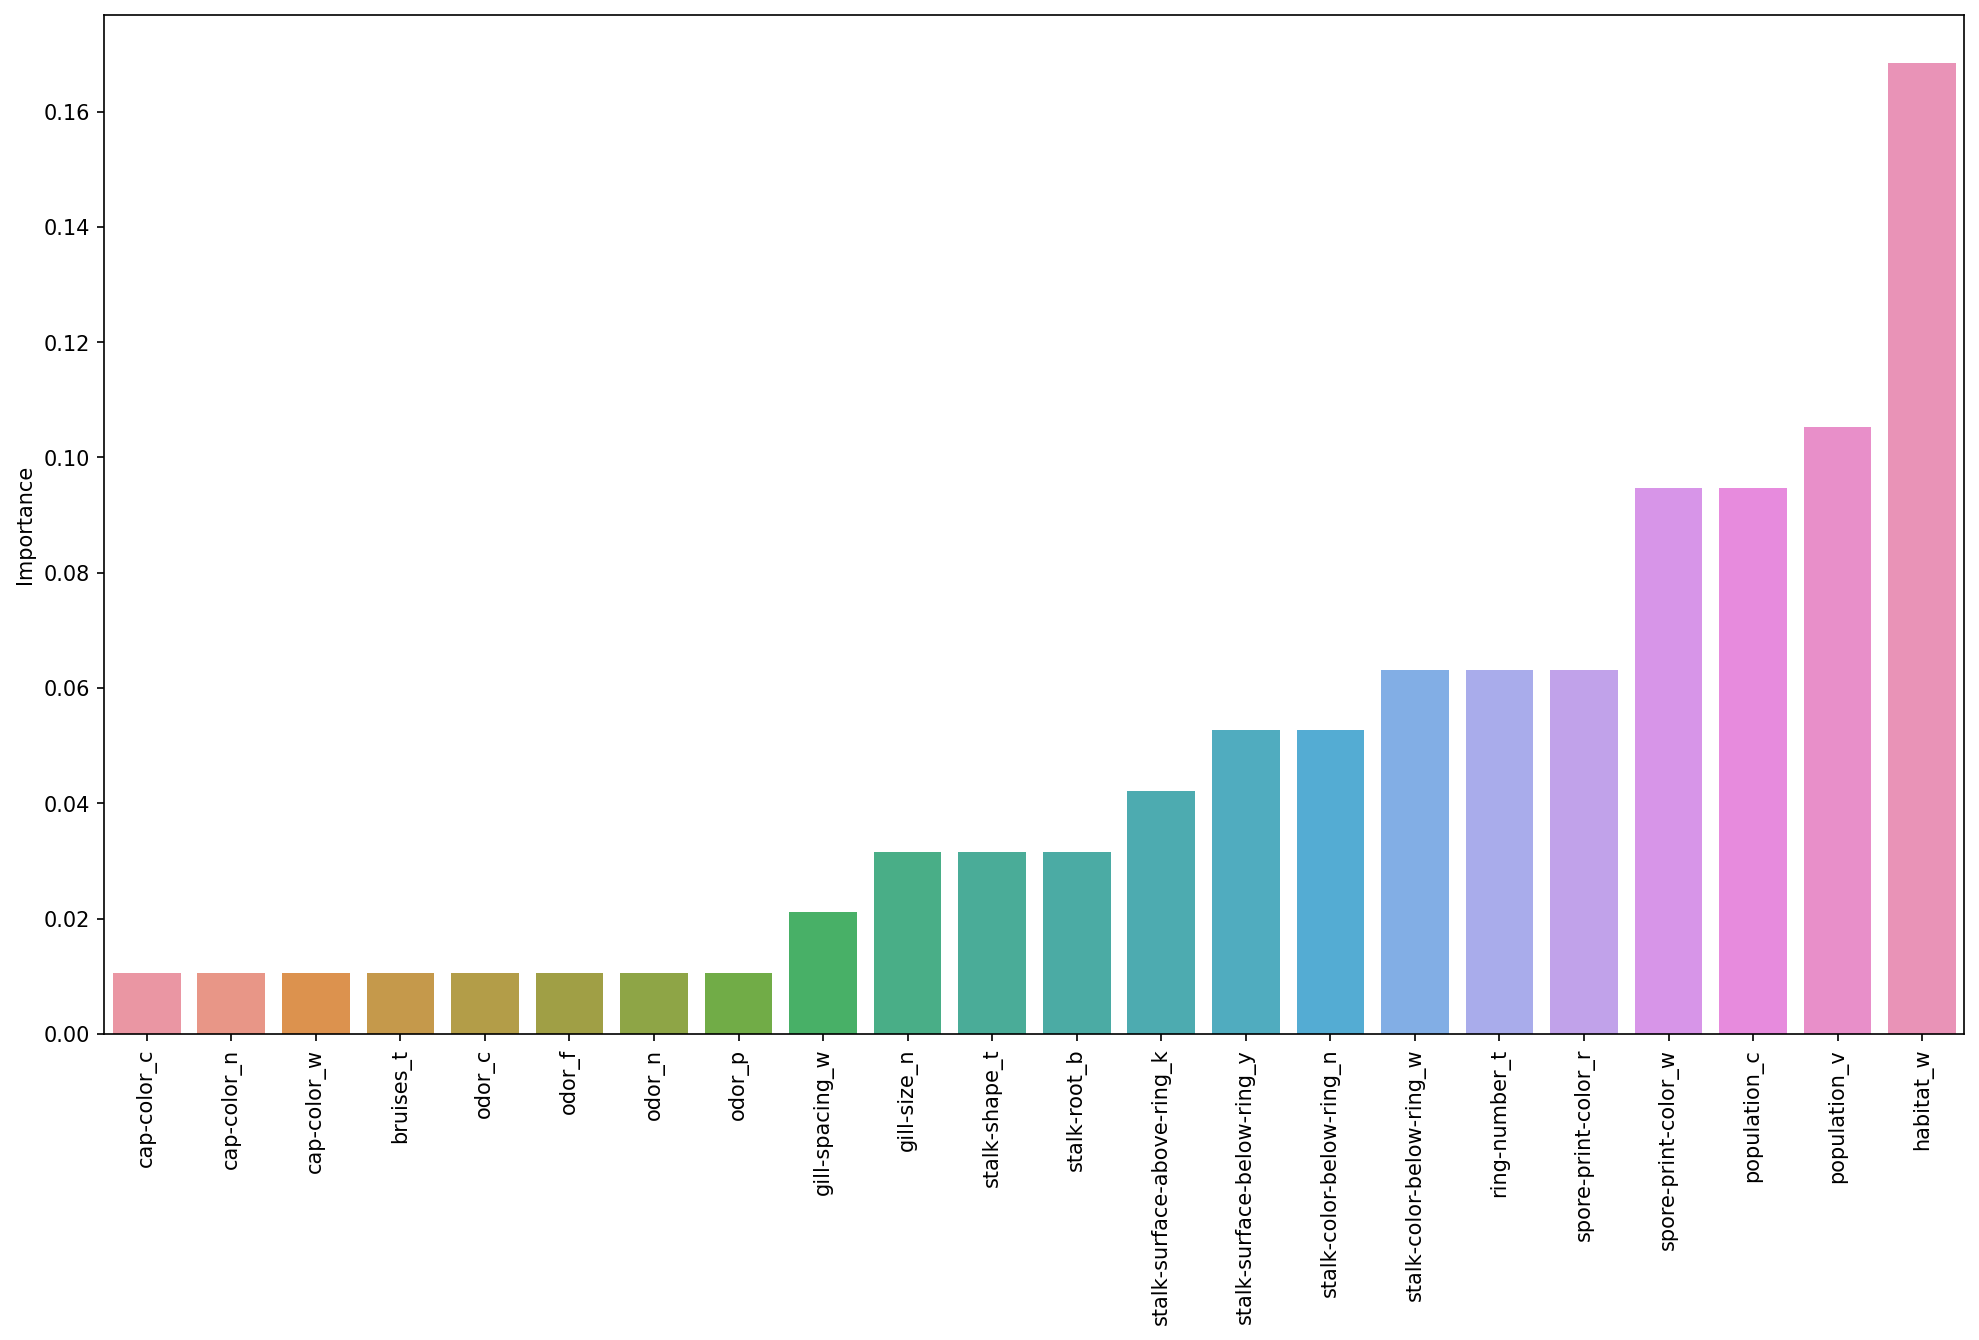

In [59]:
plt.figure(figsize=(16, 9), dpi = 150)
sns.barplot(data=feats.sort_values('Importance'), x = feats.index, y='Importance' )
plt.xticks(rotation=90)
plt.show()